**SD:**

-Prostate = [1.7, 2, 2.5]

-Bladder = [0.7, 0.7, 3]

-Rectum = [1.3, 1.3, 3]

In [1]:
%matplotlib inline

from dicom_utils import *
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
#import assd_func as af
from skimage import morphology
import matplotlib.patches as mpatches
import assd_func_Sobel_2 as af_Sobel
from parameter_tuning_func import *

In [2]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\1"
output_dir = "Output"
images, slices, contours, labels, dummy_mask = main(dicom_dir, output_dir)

In [3]:
contour_table = pd.DataFrame()
number = []
name = []
for i in range(24):
    number.append(contours[i]["number"])
    name.append(contours[i]["name"])
#contour_table["number"] = number
contour_table["name"] = name

In [4]:
contour_table

,name
0,marked iso
1,a prostate
2,b SV
3,PTV
4,d rectum
5,e bladder
6,f Femural Heads
7,g nt avoid
8,fiducials
9,p ring


## Rectum

(-0.5, 511.5, 511.5, -0.5)

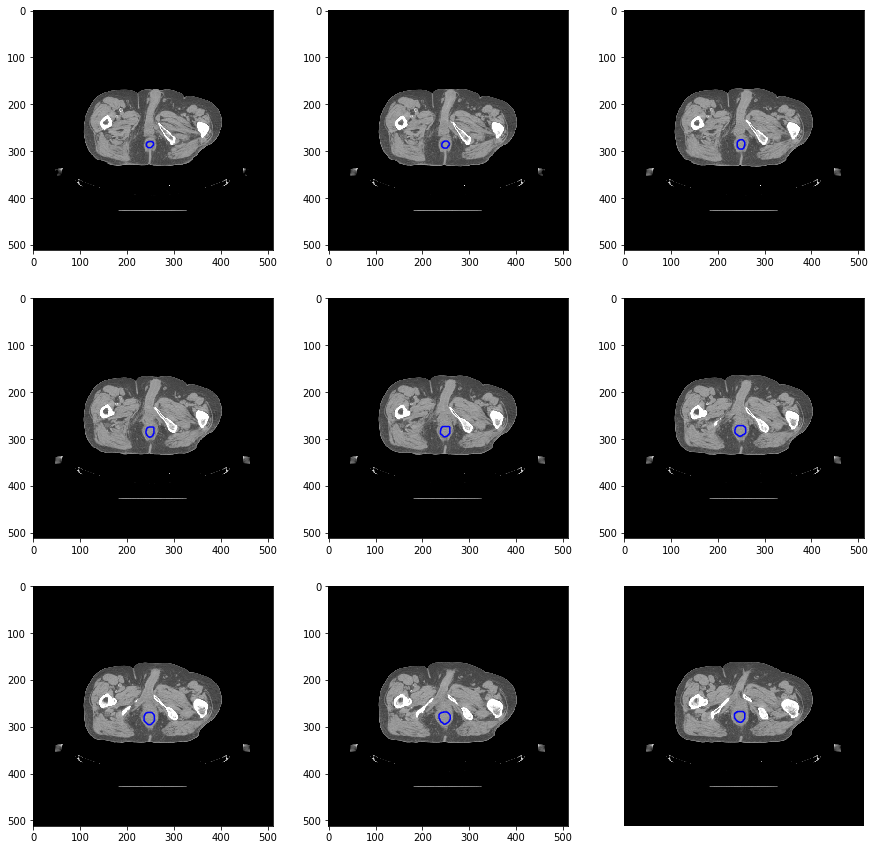

In [5]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 55, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 4][i + 55, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# Sobel and 3D Permutation

In [6]:
import random
from scipy.stats import uniform,norm

random.seed(1)
random.random()

0.13436424411240122

In [5]:
target_img1 = images[75, ...]
target_label1 = labels[..., 4][75, ...]

## Making output contour from the seed consistent

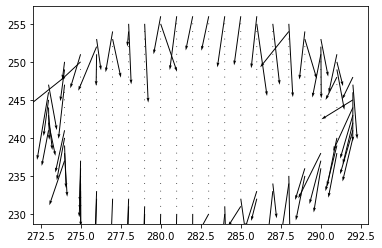

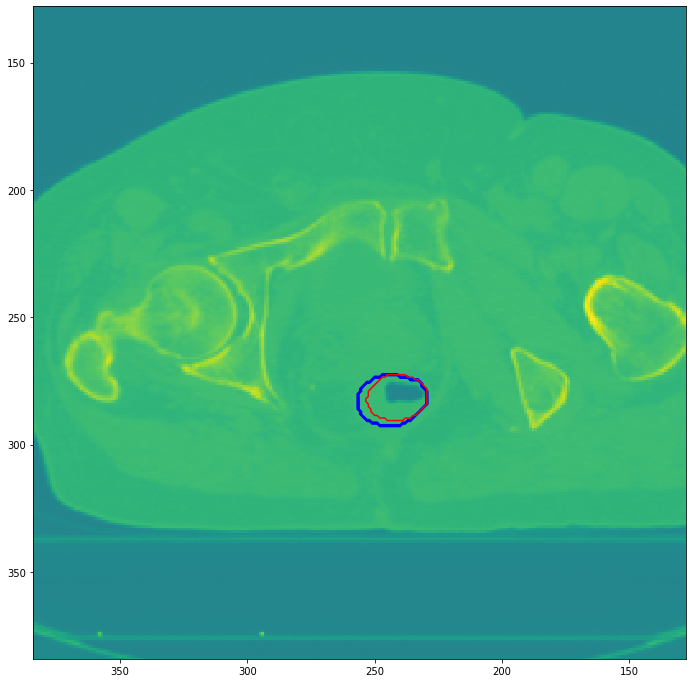

In [9]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 30
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 1
seed=123
dx, dy, mask, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img1, target_label1, voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
du_1 = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=True, plot=True, display=True)

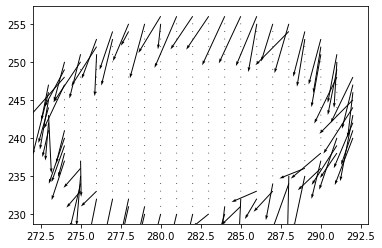

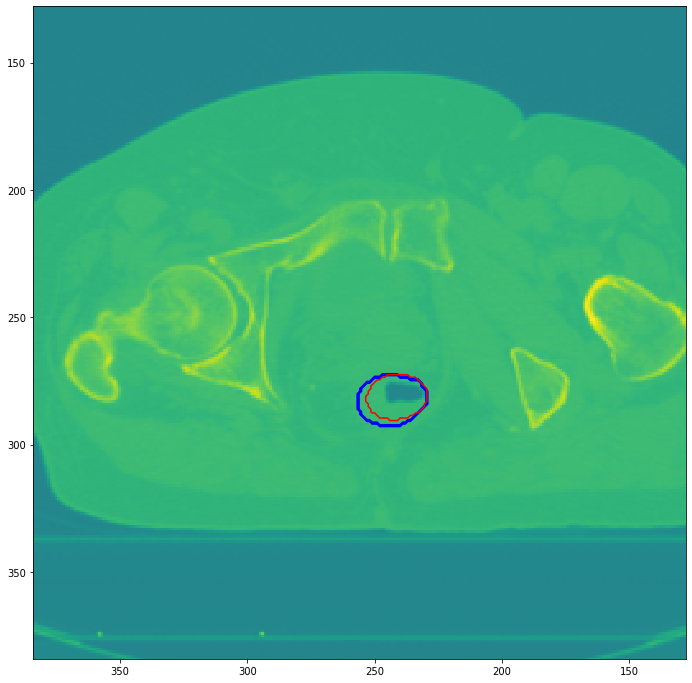

In [10]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 30
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 1
seed=123
dx, dy, mask, t2, L2, roi_z = af_Sobel.assd_Sobel(target_img1, target_label1, voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
du_1 = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=True, plot=True, display=True)

## Paremeter Experimentation

**Testing Functions:**

**1. Different c*SD**

Looking for c with great variation (not too small but not too large)

Limit is 100 since the contour is out of bound after that

plt.figure(figsize=(15, 15))
plt.imshow(target_img1, cmap="gray")
plt.contour(mask, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
plt.xlim(270, 220)
plt.ylim(300, 260)
plt.show()

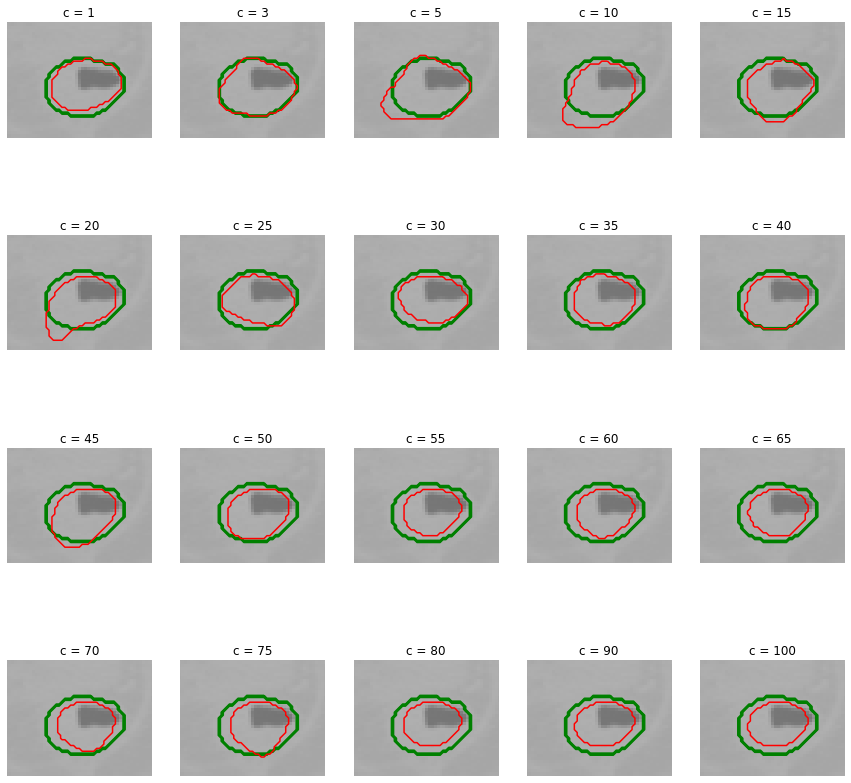

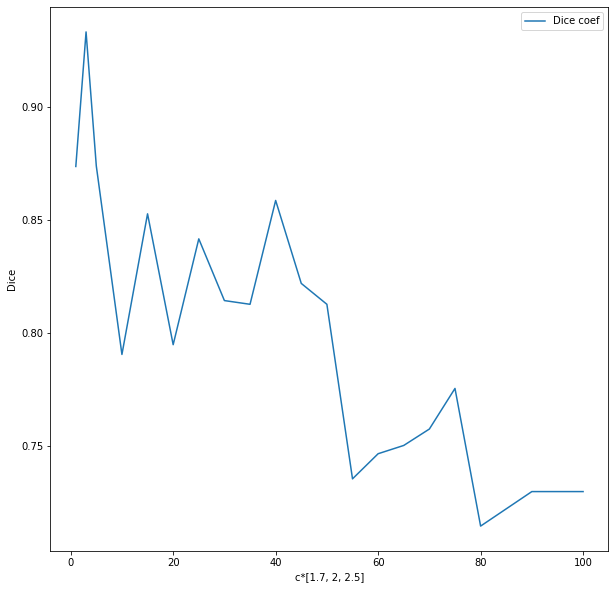

In [6]:
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100]
SD = [1.3, 1.3, 3]
df = find_c(target_img1, target_label1, images, labels, c_list, SD ,xlim = [270, 220], ylim = [300, 260], plot_dice=True)

In [ ]:
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\coutour_segmentation\\Output"
df.write_csv(destination_path + "Dice_log_Rectum.csv")

20 seem has a lot of variation and also in the good dice (0.86 which is not too high or too low)

**Different k working with best c*SD**

c = 5

array([ 3,  6, 12])

In [7]:
k_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100]
c = 5
df = find_k(target_img1, target_label1, images, labels, k_list, c, SD, df, xlim = [270, 220], ylim = [300, 260], plot_dice=True)
df.write_csv(destination_path + "Dice_log_Rectum.csv")

5*[1.7, 2, 2.5]


NameError: name 'c_list' is not defined

<Figure size 1080x1080 with 0 Axes>

c = 10

In [ ]:
c = 10
df = find_k(target_img1, target_label1, images, labels, k_list, c, SD, df, xlim = [270, 220], ylim = [300, 260], plot_dice=True)
df.write_csv(destination_path + "Dice_log_Rectum.csv")

c = 15

In [ ]:
c = 15
df = find_k(target_img1, target_label1, images, labels, k_list, c, SD, df, xlim = [270, 220], ylim = [300, 260], plot_dice=True)
df.write_csv(destination_path + "Dice_log_Rectum.csv")

c = 20

In [ ]:
c = 20
df = find_k(target_img1, target_label1, images, labels, k_list, c, df, xlim = [270, 220], ylim = [300, 260], plot_dice=True)
df.write_csv(destination_path + "Dice_log_Rectum.csv")

**Different w working with best k and c*SD**

In [ ]:
w_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 5
c = 5
df = find_w(target_img1, target_label1, images, labels, w_list, k, c, SD, df,  xlim = [270, 220], ylim = [300, 260], plot_dice=True)
df.write_csv(destination_path + "Dice_log_Rectum.csv")

**Different ismax working with best w, k and c*SD**

In [ ]:
w = 3
k = 5
c = 5
df = find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, df, xlim = [270, 220], ylim = [300, 260], ismax=True, plot_dice=True)
df.write_csv(destination_path + "Dice_log_Rectum.csv")

In [ ]:
w = 3
k = 5
c = 5
df = find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, df, xlim = [270, 220], ylim = [300, 260], ismax=False, plot_dice=True)
df.write_csv(destination_path + "Dice_log_Rectum.csv")

**Best set of parameters on different slide**

In [ ]:
roi_number = 4 #rectum
assd_contour_rectum = different_slices(images, labels, roi_number, SD, k, w, ismax=False, xlim = [200, 300], ylim = [300, 200], plot=True)

In [ ]:
assd_contour.shape

In [ ]:
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\coutour_segmentation\\Output"
RTStruct([assd_contour_rectum], "rectum", slices, fname=os.path.join(destination_path, 'Rectum_contour.dcm'))